In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [61]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\polynomial regression\Tissue Growth.csv')
df.head()

,Unnamed: 0,Tissue Type,Growth Rate (mm/day),Days
0,0,Nervous,3.807947,76
1,1,Muscle,9.512072,7
2,2,Connective,7.346740,29
3,3,Epithelial,6.026719,11
4,4,Nervous,1.644585,33


In [62]:
df.tail()

,Unnamed: 0,Tissue Type,Growth Rate (mm/day),Days
795,795,Nervous,8.734027,31
796,796,Nervous,9.327971,78
797,797,Muscle,5.694819,20
798,798,Muscle,6.996843,18
799,799,Nervous,9.232744,93


In [63]:
df.shape

(800, 4)

In [64]:
df.columns

Index(['Unnamed: 0', 'Tissue Type', 'Growth Rate (mm/day)', 'Days'], dtype='object')

In [65]:
df.isnull().sum()

Unnamed: 0              0
Tissue Type             0
Growth Rate (mm/day)    0
Days                    0
dtype: int64

In [66]:
df.dtypes

Unnamed: 0                int64
Tissue Type              object
Growth Rate (mm/day)    float64
Days                      int64
dtype: object

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            800 non-null    int64  
 1   Tissue Type           800 non-null    object 
 2   Growth Rate (mm/day)  800 non-null    float64
 3   Days                  800 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 25.1+ KB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,800.0,399.500000,231.084400,0.00000,199.750000,399.50000,599.250000,799.000000
Growth Rate (mm/day),800.0,5.019868,2.906708,0.15011,2.490114,5.11682,7.561327,9.997205
Days,800.0,48.455000,28.741792,1.00000,23.000000,46.50000,74.000000,99.000000


In [70]:
df.describe(include=object).T

,count,unique,top,freq
Tissue Type,800,4,Epithelial,215


In [71]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [72]:
df

,Tissue Type,Growth Rate (mm/day),Days
0,Nervous,3.807947,76
1,Muscle,9.512072,7
2,Connective,7.346740,29
3,Epithelial,6.026719,11
4,Nervous,1.644585,33
...,...,...,...
795,Nervous,8.734027,31
796,Nervous,9.327971,78
797,Muscle,5.694819,20
798,Muscle,6.996843,18


In [73]:
num = df.select_dtypes(include=np.number).columns.tolist()
cat = df.select_dtypes(include='object').columns
print(cat)
print(num)

Index(['Tissue Type'], dtype='object')
['Growth Rate (mm/day)', 'Days']


Growth Rate (mm/day)


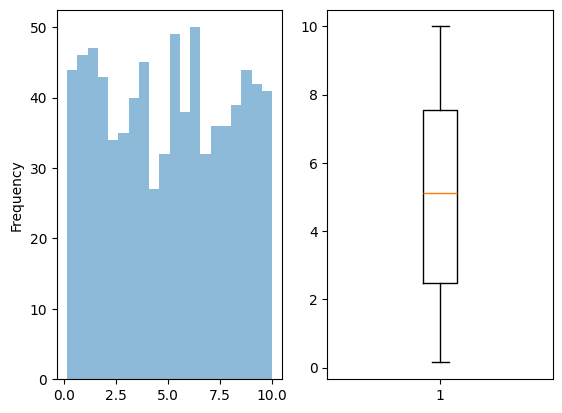

Days


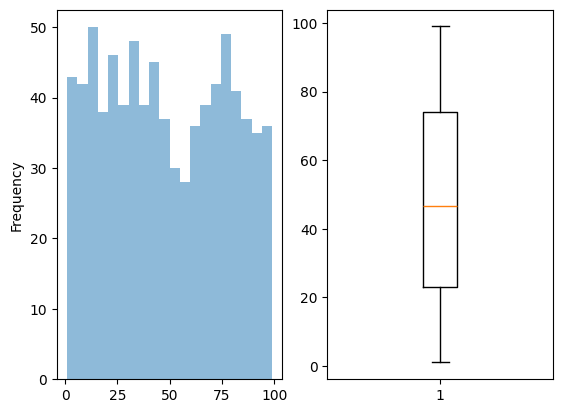

In [74]:
for i in num:
    print(i)

    plt.subplot(1, 2, 1)
    df[i].plot(kind='hist', bins=20, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(df[i])

    plt.show()

In [75]:
df['Tissue Type'].value_counts()

Tissue Type
Epithelial    215
Muscle        204
Connective    204
Nervous       177
Name: count, dtype: int64

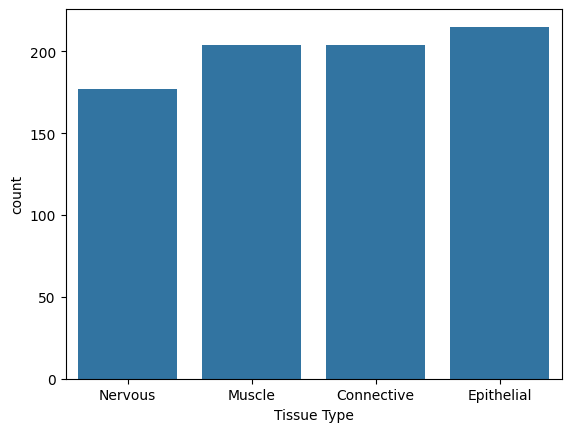

In [76]:
sns.countplot(x='Tissue Type', data=df)
plt.show()

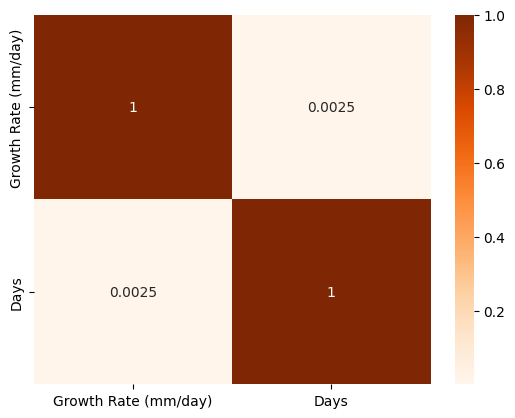

In [77]:
corr = df[num].corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Oranges')
plt.show()

In [78]:
# preparing data for polynomial regression
X = df[['Days']]
y = df['Growth Rate (mm/day)']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
# create the polynomial features
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [81]:
model = LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [82]:
zz = X_test
xyz = sorted(zz['Days'], reverse=True)
len(xyz)

160

In [85]:
y_pred = model.predict(X_test_poly)
y_pred

array([5.12945335, 5.18257016, 5.19608448, 5.12933924, 5.14341527,
       4.94243599, 5.12956302, 5.15452407, 5.08251088, 5.15064937,
       5.12285928, 4.96745501, 5.01730502, 4.96745501, 5.12305743,
       5.12882548, 5.13427748, 4.73249712, 5.12505639, 5.12408537,
       5.09198902, 5.12628274, 5.1585232 , 5.19376826, 5.12305743,
       5.05898179, 5.16672821, 5.12285928, 4.79104802, 5.18565801,
       5.12305743, 4.85125775, 5.18257016, 5.12376035, 5.16308407,
       5.19776957, 5.12647456, 5.12877439, 5.11269314, 5.19733832,
       5.16672821, 5.10696731, 5.1239947 , 5.12115161, 4.8844952 ,
       4.81495832, 5.19618433, 5.12933924, 5.19032949, 5.12475898,
       5.19376826, 5.12505639, 5.12247512, 5.12305743, 5.17882058,
       5.14693563, 5.06793725, 5.11269314, 5.13966709, 5.16260615,
       5.17882058, 5.08251088, 5.01034882, 4.85125775, 5.04468063,
       5.11738704, 4.42339769, 5.12877439, 5.12263457, 5.14341527,
       4.42339769, 4.98775749, 5.19618433, 5.19608448, 5.17215

In [86]:
train_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2_train = r2_score(y_test,y_pred)

print('rmse:',train_rmse)
print('r-square:',r2_train)

rmse: 2.84400533625093
r-square: 0.019798893608665158


In [87]:
df[df['Days']==99]

,Tissue Type,Growth Rate (mm/day),Days
19,Epithelial,2.983168,99
264,Nervous,8.785993,99
459,Muscle,1.276297,99
585,Muscle,2.477442,99
775,Nervous,1.584183,99


In [89]:
y_pred = model.predict(poly_features.fit_transform([[100]]))
y_pred = y_pred[0]
y_pred

np.float64(4.523161569025465)